In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

## Daily Challenge : Analysis Of Airplane Crashes And Fatalities

## 1. Data Import and Cleaning:

Import the dataset using Pandas.

Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.

In [8]:
df = pd.read_csv(r'/content/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [12]:
df.shape

(4998, 17)

In [10]:
# Check for missing values
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     776
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [17]:
df.drop('Time', axis=1, inplace=True)
df.drop('Flight #', axis = 1, inplace=True)
df.drop('Route', axis = 1, inplace=True)
df.drop('cn/ln', axis = 1, inplace=True)

In [18]:
# Convert dates to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [19]:
df.dtypes

Date                     datetime64[ns]
Location                         object
Operator                         object
AC Type                          object
Registration                     object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
dtype: object

## 2. Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

Analyze the frequency of crashes over time to identify any trends.

In [33]:
# Basic statistics
crashes_count = len(df)
fatalities_sum = df['Fatalities'].sum()
survivors_sum = df['Aboard'].sum() - fatalities_sum
survival_rate = survivors_sum / df['Aboard'].sum()

print('Amount of fatalities: ', fatalities_sum)
print('Amount of survivors: ', survivors_sum)
print('Survival Rate: ', survival_rate)

Amount of fatalities:  111644.0
Amount of survivors:  43712.0
Survival Rate:  0.2813666675249105


In [42]:
# Explore crashes over time
df['Year'] = df['Date'].dt.year
crashes_by_year = df['Year'].value_counts().sort_index()
print(crashes_by_year)

1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2019    13
2020     8
2021     9
2022     6
2023     4
Name: Year, Length: 113, dtype: int64


## 3. Statistical Analysis:

Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

In [23]:
# Analyze the distribution of fatalities and survival rates
fatalities_distribution = df['Fatalities'].dropna()
survival_rate_distribution = df['Aboard'].sub(df['Fatalities']).dropna() / df['Aboard'].dropna()

In [29]:
# Calculate key statistics
fatalities_mean = fatalities_distribution.mean()
print('Fatalities mean ', fatalities_mean)

fatalities_median = fatalities_distribution.median()
print('Fatalities median ', fatalities_median)

fatalities_std = fatalities_distribution.std()
print('Fatalities standart deveation ', fatalities_std)

survival_rate_mean = survival_rate_distribution.mean()
print('\nSurvival Rate mean ', survival_rate_mean)

survival_rate_median = survival_rate_distribution.median()
print('Survival Rate median ', survival_rate_median)

survival_rate_std = survival_rate_distribution.std()
print('Survival Rate standart deveation ', survival_rate_std)

Fatalities mean  22.37354709418838
Fatalities median  11.0
Fatalities standart deveation  35.06174065974316

Survival Rate mean  0.181489019431307
Survival Rate median  0.0
Survival Rate standart deveation  0.3117242492487905


In [38]:
# Conduct a hypothesis test
# The null hypothesis: There is no significant difference in average fatalities between the two decades.
# Alternative hypothes: There is a significant difference in average fatalities between the two decades.

# Create a new column for decades
df['Decade'] = (df['Year'] // 10) * 10

# Perform a t-test
decade_1 = df[df['Decade'] == 1950]['Fatalities'].dropna()
decade_2 = df[df['Decade'] == 2000]['Fatalities'].dropna()

# Perform the t-test
t_statistic, p_value = ttest_ind(decade_1, decade_2)

# Print the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

T-Statistic: -2.263541007505455
P-Value: 0.023787769823978115


In [40]:
# Reject or Not the null hypothesis
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in average fatalities between the two decades.')
else:
    print('Not reject the null hypothesis: There is no significant difference in average fatalities between the two decades.')

Reject the null hypothesis: There is a significant difference in average fatalities between the two decades.


## 4. Visualization:

Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.

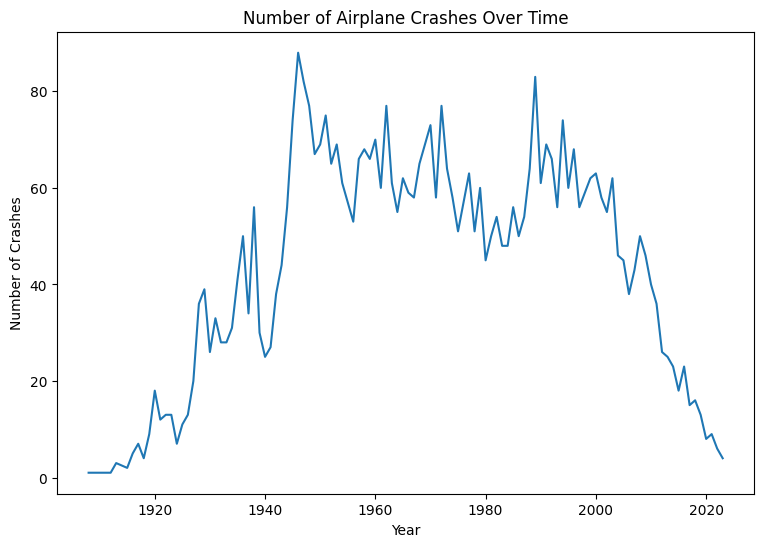

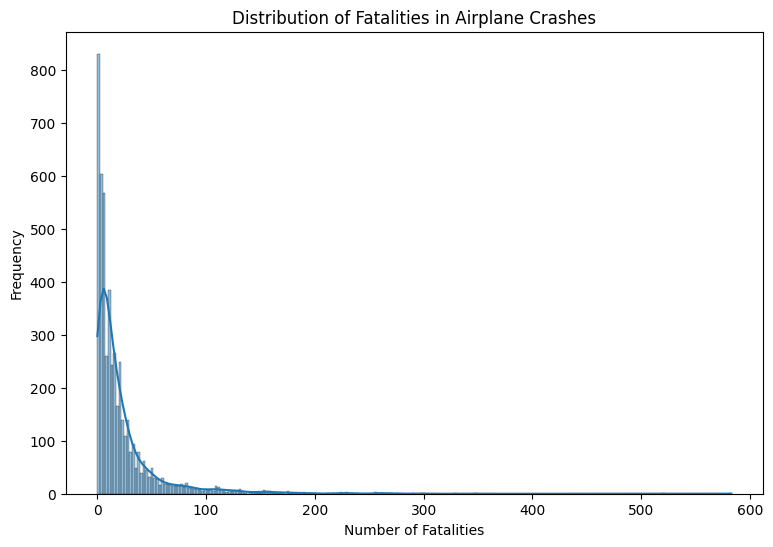

In [46]:
# Crashes over years
plt.figure(figsize=(9, 6))
sns.lineplot(x=crashes_by_year.index, y=crashes_by_year.values)
plt.title('Number of Airplane Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

# Fatalities
plt.figure(figsize=(9, 6))
sns.histplot(fatalities_distribution, kde=True)
plt.title('Distribution of Fatalities in Airplane Crashes')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.show()

## 5. Insight and Report:

Summarize your findings and provide insights into the patterns or anomalies discovered in the data.



*   The time series plot showed fluctuations in the number of crashes over the years. Any distinct patterns or anomalies should be further investigated.

*   The histogram of fatalities showcased the variability in the severity of crashes. Understanding the distribution is crucial for assessing the overall impact of airplane accidents.

*   The t-test results comparing the average fatalities between different decades could reveal whether safety measures or aviation practices have significantly improved or worsened over time.